## Contents Of the notebook
 ### Data Cleaning
 * [Detect and handle missing values in RENTED_BIKE_COUNT collumn](#RENTED-BIKE)
 * [Detect and handle missing values in TEMPERATURE collumn](#TEMPERATURE)
 
 ### [Descriptive statistics](#desc)
 
 
 ### Data Visualization
 * [Bike rental by date and time](#datetime)
 * [Histogram of RENTED_BIKE_COUNT](#hist)
 * [Bike rental by Temperature on every seasons](#temp)
 * [Daily Total rainfall and snowfall](#total)

### load the required library


In [11]:
#load the required library
library(dplyr)
library(tidyverse)
library(ggplot2)
library(patchwork)
theme_set(theme_light())

### Load the dataset

In [45]:
#load the dataset
seoul_bike<-read.csv("raw_seoul_bike_sharing.csv")
head(seoul_bike)
summary(seoul_bike)


,Date,RENTED_BIKE_COUNT,Hour,TEMPERATURE,HUMIDITY,WIND_SPEED,Visibility,DEW_POINT_TEMPERATURE,SOLAR_RADIATION,RAINFALL,Snowfall,SEASONS,HOLIDAY,FUNCTIONING_DAY
,<chr>,<int>,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
1,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0,0,0,Winter,No Holiday,Yes
2,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0,0,0,Winter,No Holiday,Yes
3,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0,0,0,Winter,No Holiday,Yes
4,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0,0,0,Winter,No Holiday,Yes
5,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0,0,0,Winter,No Holiday,Yes
6,01/12/2017,100,5,-6.4,37,1.5,2000,-18.7,0,0,0,Winter,No Holiday,Yes


     Date           RENTED_BIKE_COUNT      Hour        TEMPERATURE    
 Length:8760        Min.   :   2.0    Min.   : 0.00   Min.   :-17.80  
 Class :character   1st Qu.: 214.0    1st Qu.: 5.75   1st Qu.:  3.40  
 Mode  :character   Median : 542.0    Median :11.50   Median : 13.70  
                    Mean   : 729.2    Mean   :11.50   Mean   : 12.87  
                    3rd Qu.:1084.0    3rd Qu.:17.25   3rd Qu.: 22.50  
                    Max.   :3556.0    Max.   :23.00   Max.   : 39.40  
                    NA's   :295                       NA's   :11      
    HUMIDITY       WIND_SPEED      Visibility   DEW_POINT_TEMPERATURE
 Min.   : 0.00   Min.   :0.000   Min.   :  27   Min.   :-30.600      
 1st Qu.:42.00   1st Qu.:0.900   1st Qu.: 940   1st Qu.: -4.700      
 Median :57.00   Median :1.500   Median :1698   Median :  5.100      
 Mean   :58.23   Mean   :1.725   Mean   :1437   Mean   :  4.074      
 3rd Qu.:74.00   3rd Qu.:2.300   3rd Qu.:2000   3rd Qu.: 14.800      
 Max.   :98.

From the summary above we can see there some missing values on `RENTED_BIKE_COUNT` and `TEMPERATURE COLLUMN`

Considering `RENTED_BIKE_COUNT` is the response variable/dependent variable, i.e., we want to predict the `RENTED_BIKE_COUNT` using other predictor/independent variables later, and we normally can not allow missing values for the response variable, so missing values for response variable must be either dropped or imputed properly.

We can see that `RENTED_BIKE_COUNT` only has about 3% missing values (295 / 8760). that means i can safely drop any rows whose `RENTED_BIKE_COUNT` has missing values.



<a id="RENTED-BIKE"> </a>

# Data Cleaning
### Detect and handle missing values in RENTED_BIKE_COUNT collumn

In [36]:
# Drop rows with missing values on RENTED_BIKE_COUNT
cleaned_bike_sharing<-seoul_bike %>%
drop_na(RENTED_BIKE_COUNT)
summary(cleaned_bike_sharing)

     Date           RENTED_BIKE_COUNT      Hour        TEMPERATURE    
 Length:8465        Min.   :   2.0    Min.   : 0.00   Min.   :-17.80  
 Class :character   1st Qu.: 214.0    1st Qu.: 6.00   1st Qu.:  3.00  
 Mode  :character   Median : 542.0    Median :12.00   Median : 13.40  
                    Mean   : 729.2    Mean   :11.51   Mean   : 12.75  
                    3rd Qu.:1084.0    3rd Qu.:18.00   3rd Qu.: 22.60  
                    Max.   :3556.0    Max.   :23.00   Max.   : 39.40  
                                                      NA's   :11      
    HUMIDITY       WIND_SPEED      Visibility   DEW_POINT_TEMPERATURE
 Min.   : 0.00   Min.   :0.000   Min.   :  27   Min.   :-30.600      
 1st Qu.:42.00   1st Qu.:0.900   1st Qu.: 935   1st Qu.: -5.100      
 Median :57.00   Median :1.500   Median :1690   Median :  4.700      
 Mean   :58.15   Mean   :1.726   Mean   :1434   Mean   :  3.945      
 3rd Qu.:74.00   3rd Qu.:2.300   3rd Qu.:2000   3rd Qu.: 15.200      
 Max.   :98.

We can see from the summary above missing values in RENTED_BIKE_COUNT have been removed now lets detect and handle missing values in TEMPERATURE COLLUMN

<a id="TEMPERATURE"> </a>

### Detect and handle missing values in TEMPERATURE collumn

Unlike the `RENTED_BIKE_COUNT` variable, `TEMPERATURE` is not a response variable. However, it is still an important predictor variable,there may be a positve correlation between `TEMPERATURE` and `RENTED_BIKE_COUNT`. For example, in winter time with lower temperatures, people may not want to ride a bike, while in summer with nicer weather, they are more likely to rent a bike.

In [37]:
#check missing values in temperature collumn
cleaned_bike_sharing %>% 
                filter(is.na(TEMPERATURE))

Date,RENTED_BIKE_COUNT,Hour,TEMPERATURE,HUMIDITY,WIND_SPEED,Visibility,DEW_POINT_TEMPERATURE,SOLAR_RADIATION,RAINFALL,Snowfall,SEASONS,HOLIDAY,FUNCTIONING_DAY
<chr>,<int>,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
07/06/2018,3221,18,NA,57,2.7,1217,16.4,0.96,0.0,0,Summer,No Holiday,Yes
12/06/2018,1246,14,NA,45,2.2,1961,12.7,1.39,0.0,0,Summer,No Holiday,Yes
13/06/2018,2664,17,NA,57,3.3,919,16.4,0.87,0.0,0,Summer,No Holiday,Yes
17/06/2018,2330,17,NA,58,3.3,865,16.7,0.66,0.0,0,Summer,No Holiday,Yes
20/06/2018,2741,19,NA,61,2.7,1236,17.5,0.60,0.0,0,Summer,No Holiday,Yes
30/06/2018,1144,13,NA,87,1.7,390,23.2,0.71,3.5,0,Summer,No Holiday,Yes
05/07/2018,827,10,NA,75,1.1,1028,20.8,1.22,0.0,0,Summer,No Holiday,Yes
11/07/2018,634,9,NA,96,0.6,450,24.9,0.41,0.0,0,Summer,No Holiday,Yes
12/07/2018,593,6,NA,93,1.1,852,24.3,0.01,0.0,0,Summer,No Holiday,Yes


It seems that all of the missing values for `TEMPERATURE` are found in `SEASONS == Summer`, so it is reasonable to impute those missing values with the summer average temperature

In [38]:
# Calculate the summer average temperature
avgt<-mean(cleaned_bike_sharing$TEMPERATURE [cleaned_bike_sharing$SEASONS == "Summer"],na.rm=TRUE)
avg_temperature<-format(round(avgt,1))
avg_temperature

[1] "26.6"

In [39]:
# Impute missing values for TEMPERATURE column with summer average temperature
cleaner_bike_df<-cleaned_bike_sharing %>% replace_na(list(TEMPERATURE= 26.6))
convert<-toupper(colnames(cleaner_bike_df))
    colnames(cleaner_bike_df)<- convert

#print the summary again to make sure there are no missing values in all collumns
summary(cleaner_bike_df)

     DATE           RENTED_BIKE_COUNT      HOUR        TEMPERATURE    
 Length:8465        Min.   :   2.0    Min.   : 0.00   Min.   :-17.80  
 Class :character   1st Qu.: 214.0    1st Qu.: 6.00   1st Qu.:  3.00  
 Mode  :character   Median : 542.0    Median :12.00   Median : 13.50  
                    Mean   : 729.2    Mean   :11.51   Mean   : 12.77  
                    3rd Qu.:1084.0    3rd Qu.:18.00   3rd Qu.: 22.70  
                    Max.   :3556.0    Max.   :23.00   Max.   : 39.40  
    HUMIDITY       WIND_SPEED      VISIBILITY   DEW_POINT_TEMPERATURE
 Min.   : 0.00   Min.   :0.000   Min.   :  27   Min.   :-30.600      
 1st Qu.:42.00   1st Qu.:0.900   1st Qu.: 935   1st Qu.: -5.100      
 Median :57.00   Median :1.500   Median :1690   Median :  4.700      
 Mean   :58.15   Mean   :1.726   Mean   :1434   Mean   :  3.945      
 3rd Qu.:74.00   3rd Qu.:2.300   3rd Qu.:2000   3rd Qu.: 15.200      
 Max.   :98.00   Max.   :7.400   Max.   :2000   Max.   : 27.200      
 SOLAR_RADIAT

In [41]:
date_format<-function(x){
    return(as.Date(cleaner_bike_df$DATE,format='%d/%m/%Y'))}

#Change the DATE collumn format into date
seoul_bike_sharing<-cleaner_bike_df %>% mutate(DATE=date_format(DATE))

#export the dataframe for building bike prediction model
write_csv(seoul_bike_sharing,"cleaned_seoul_bike_sharing.csv")

<a id="desc"> </a>

# Descriptive Statistics

In [42]:
summary(seoul_bike_sharing)

      DATE            RENTED_BIKE_COUNT      HOUR        TEMPERATURE    
 Min.   :2017-12-01   Min.   :   2.0    Min.   : 0.00   Min.   :-17.80  
 1st Qu.:2018-02-27   1st Qu.: 214.0    1st Qu.: 6.00   1st Qu.:  3.00  
 Median :2018-05-28   Median : 542.0    Median :12.00   Median : 13.50  
 Mean   :2018-05-28   Mean   : 729.2    Mean   :11.51   Mean   : 12.77  
 3rd Qu.:2018-08-24   3rd Qu.:1084.0    3rd Qu.:18.00   3rd Qu.: 22.70  
 Max.   :2018-11-30   Max.   :3556.0    Max.   :23.00   Max.   : 39.40  
    HUMIDITY       WIND_SPEED      VISIBILITY   DEW_POINT_TEMPERATURE
 Min.   : 0.00   Min.   :0.000   Min.   :  27   Min.   :-30.600      
 1st Qu.:42.00   1st Qu.:0.900   1st Qu.: 935   1st Qu.: -5.100      
 Median :57.00   Median :1.500   Median :1690   Median :  4.700      
 Mean   :58.15   Mean   :1.726   Mean   :1434   Mean   :  3.945      
 3rd Qu.:74.00   3rd Qu.:2.300   3rd Qu.:2000   3rd Qu.: 15.200      
 Max.   :98.00   Max.   :7.400   Max.   :2000   Max.   : 27.200      

## Some Basic observations

* Based on the DATE we can conclude that this dataset have exactly a year of data
* NO record have zero bike counts 
* The average `WIND_SPEED` is very light at only 1.7 m/s , and even the maximum is only a moderate breeze 

### How many Holidays are there ?

In [43]:
sum(seoul_bike_sharing$HOLIDAY == 'Holiday')

[1] 408

### How Many records are there ?

In [20]:
count(seoul_bike_sharing)

n
<int>
8465


### How many  percentage of the records that fall on holiday ?

In [21]:
percentage<-(holidays/length(seoul_bike_sharing$HOLIDAY))*100
round(percentage,1)

[1] 4.8

### Seasonal total rainfall and snowfall

In [22]:
seoul_bike_sharing %>%
group_by(SEASONS) %>%
summarize(sum(RAINFALL),sum(SNOWFALL))

SEASONS,sum(RAINFALL),sum(SNOWFALL)
<chr>,<dbl>,<dbl>
Autumn,227.9,123.0
Spring,403.8,0.0
Summer,559.7,0.0
Winter,70.9,534.6


<a id="datetime"> </a>

## Data Visualization
### Bike rental by date and time 

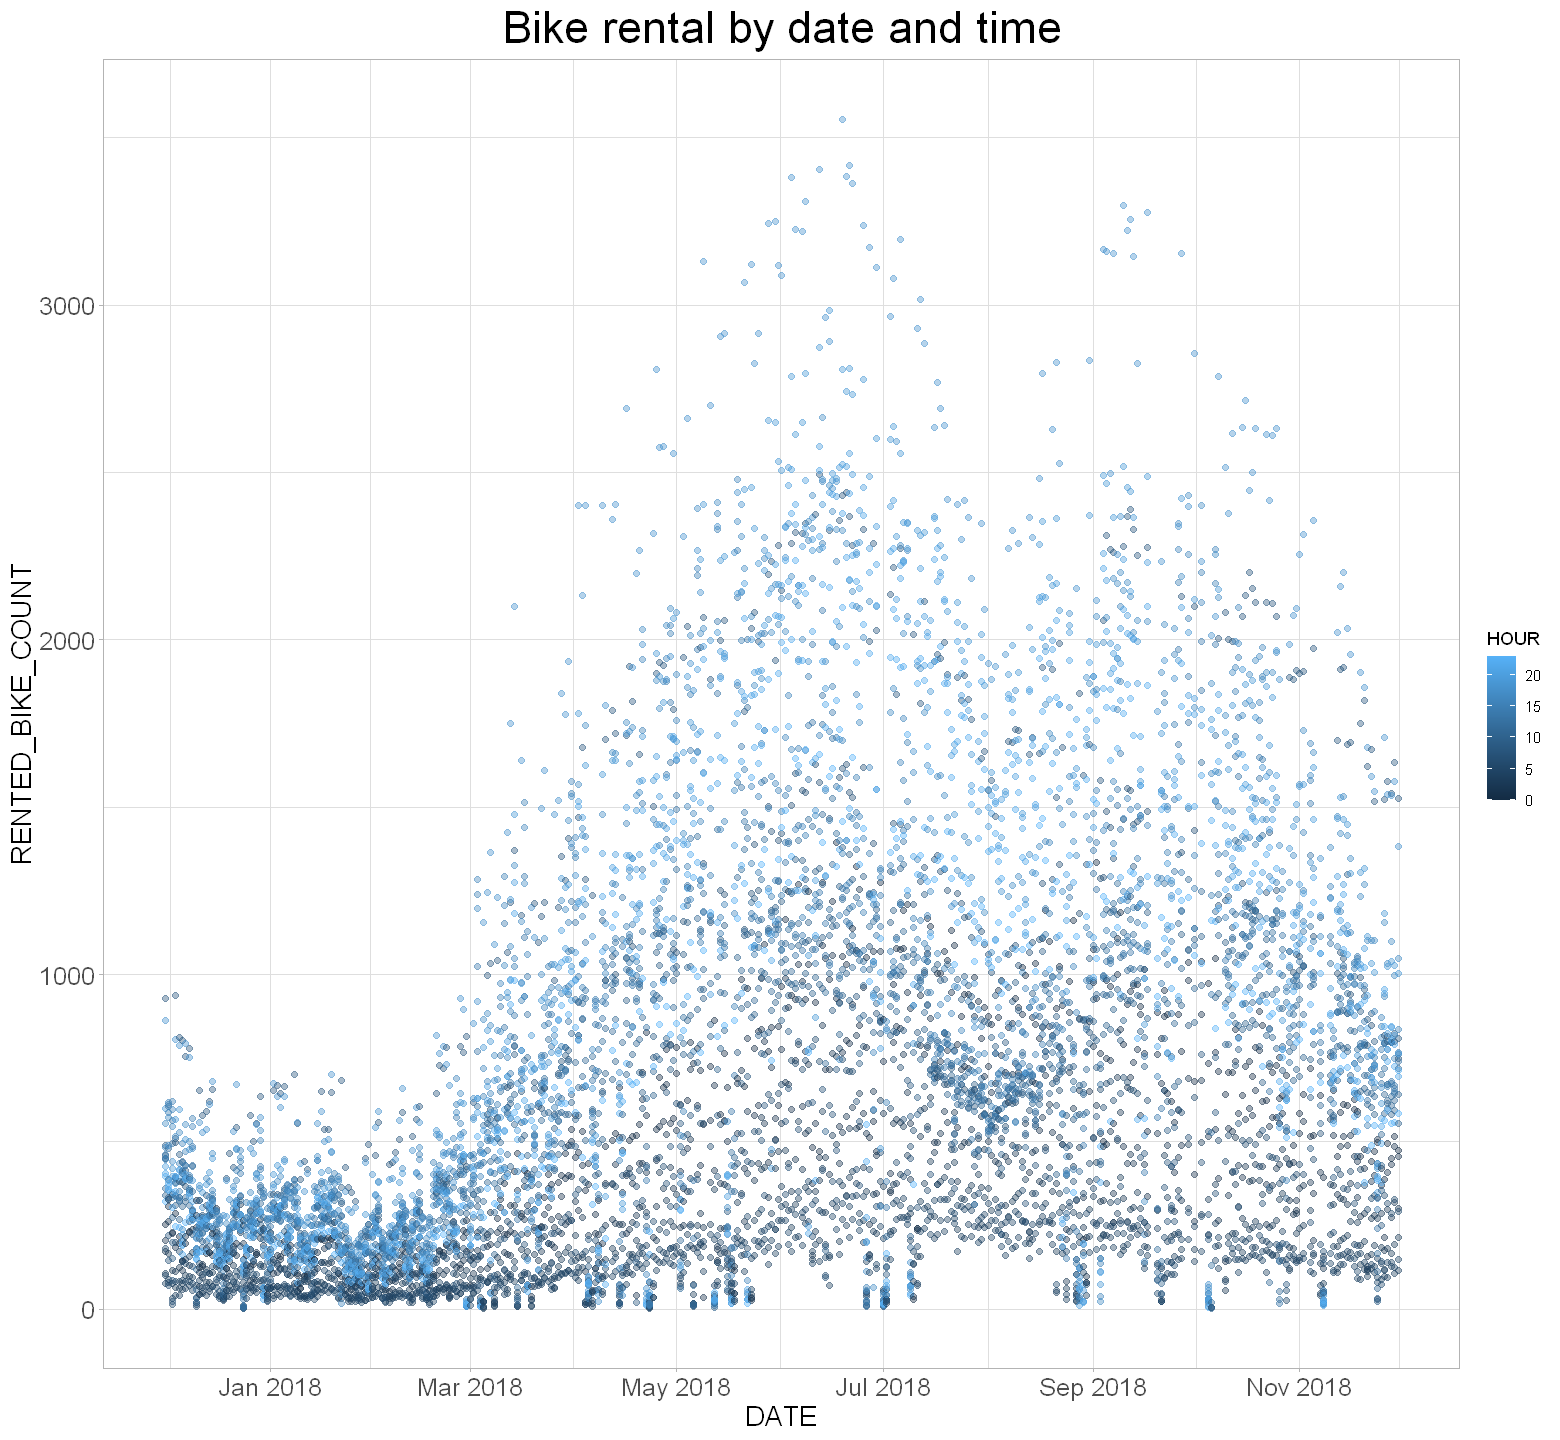

In [46]:
#options(repr.plot.width=13, repr.plot.height=12)
ggplot(seoul_bike_sharing,aes(DATE,RENTED_BIKE_COUNT,colour=HOUR)) +
geom_point(alpha= 0.4) +
scale_x_date(date_breaks = "2 month",date_labels="%b %Y") +
ggtitle("Bike rental by date and time ") +
theme(plot.title = element_text(size =27,hjust=0.51),axis.text = element_text(size = 15),axis.title=element_text(size=16))

<a id="hist"> </a>

We can see that most of the high rented bike count happens after evening

apparently people doesnt rent bike so much between dec to march 

### Histogram of RENTED_BIKE_COUNT

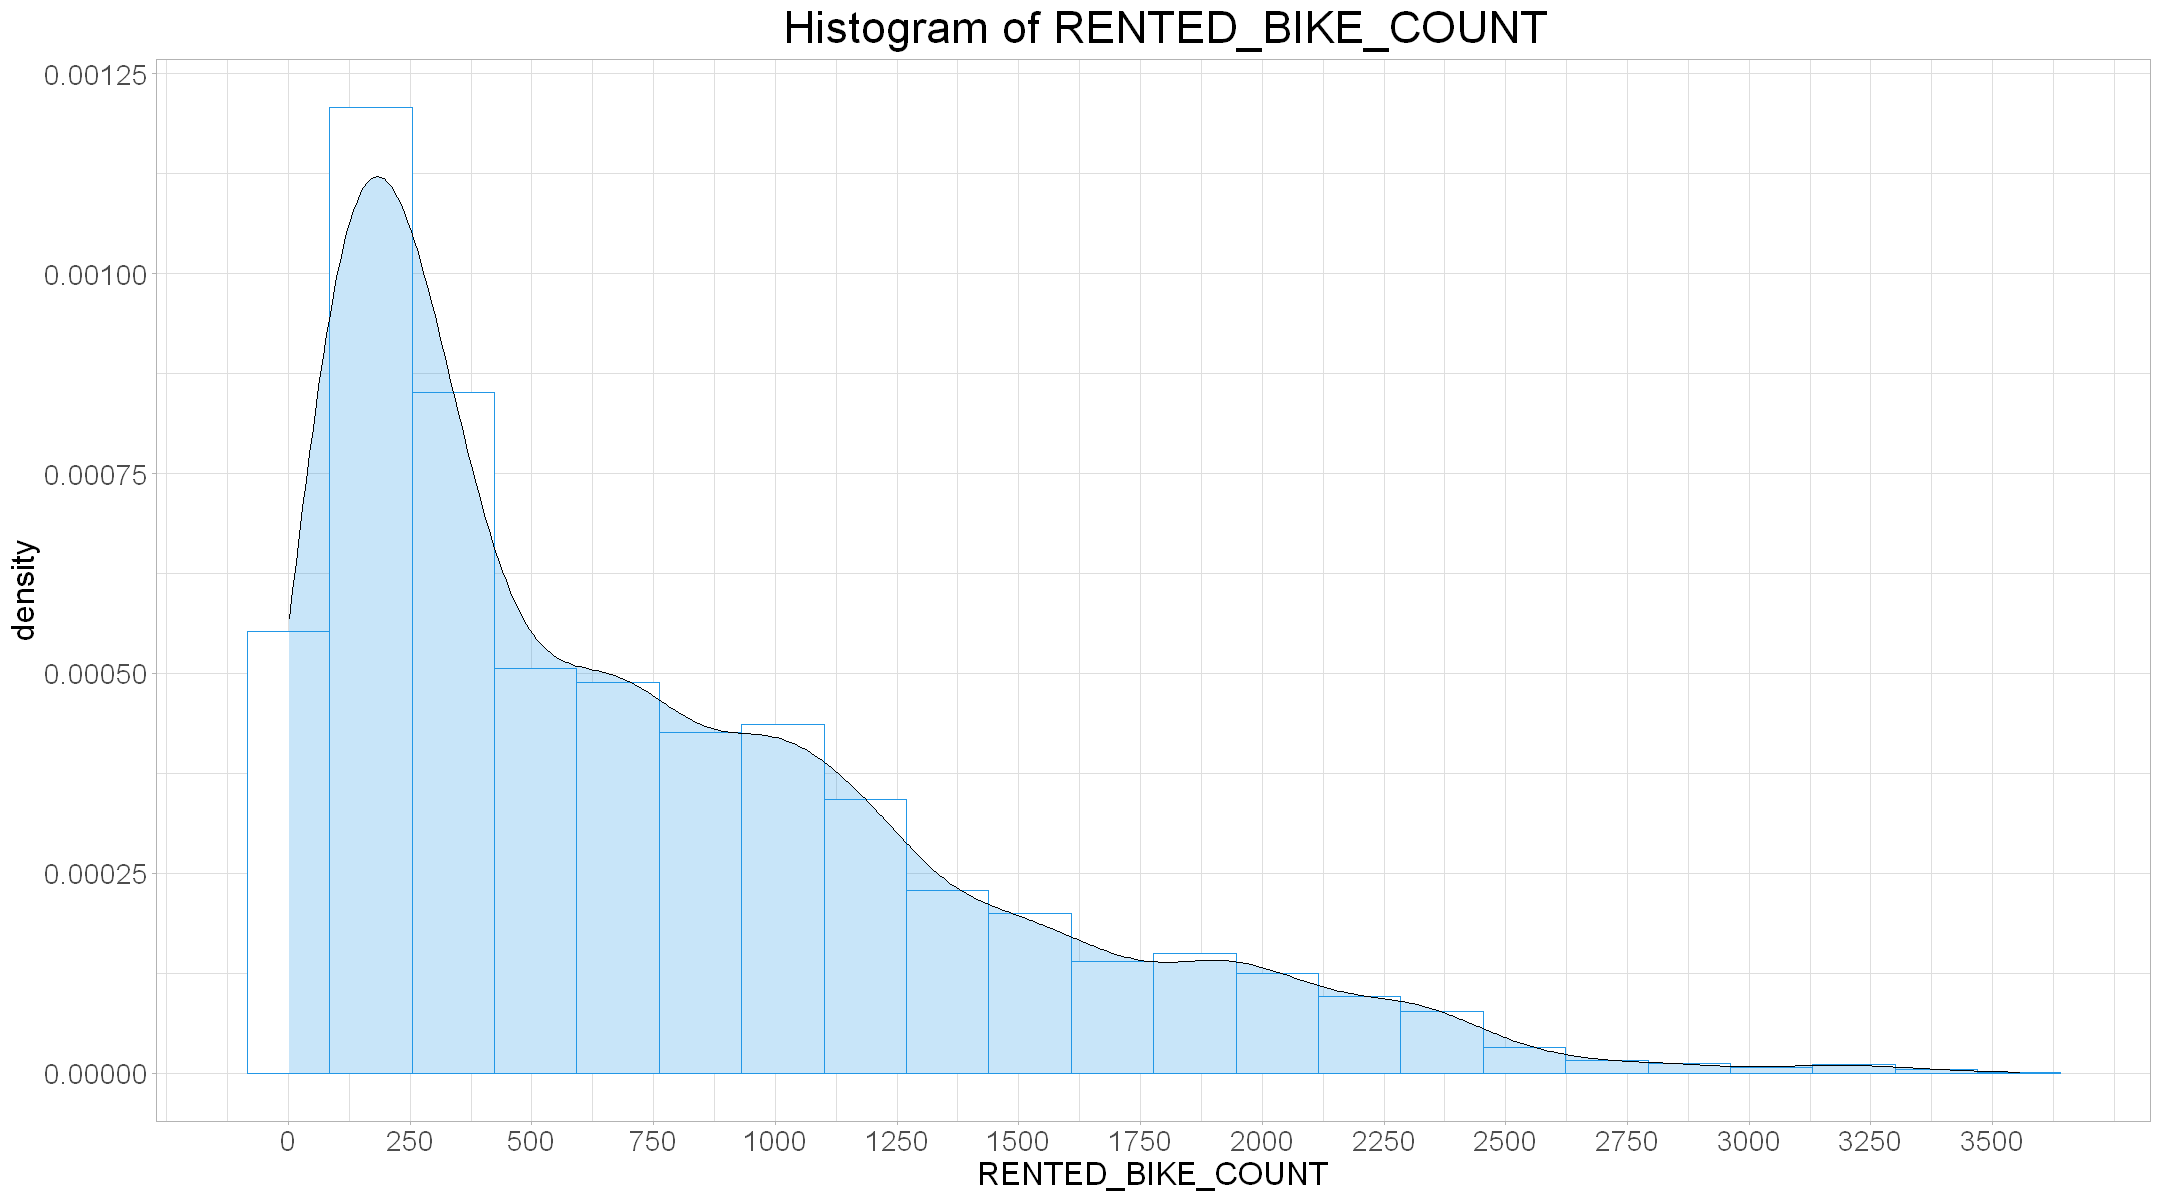

In [48]:
options(repr.plot.width=18, repr.plot.height=10)
ggplot(seoul_bike_sharing,aes(x=RENTED_BIKE_COUNT))+
    geom_histogram(aes(y=..density..),bins=22,fill="white",colour=4)+
    geom_density(alpha=0.25,fill=4)+
    ggtitle("Histogram of RENTED_BIKE_COUNT")+
    scale_x_continuous(breaks=c(0,250,500,750,1000,1250,1500,1750,2000,2250,2500,2750,3000,3250,3500,4000))+
    theme(plot.title = element_text(size =27,hjust=0.51),axis.text = element_text(size = 17),axis.title=element_text(size=19))

<a id="temp"> </a>


We can see from the histogram most of the time there are relatively few bikes rented. Most frequent ammount of bikes rented is about 250

Judging from the tail of the distribution, on rare occasions there are many more bikes rented out than usual.

### Bike rental by Temperature on every seasons

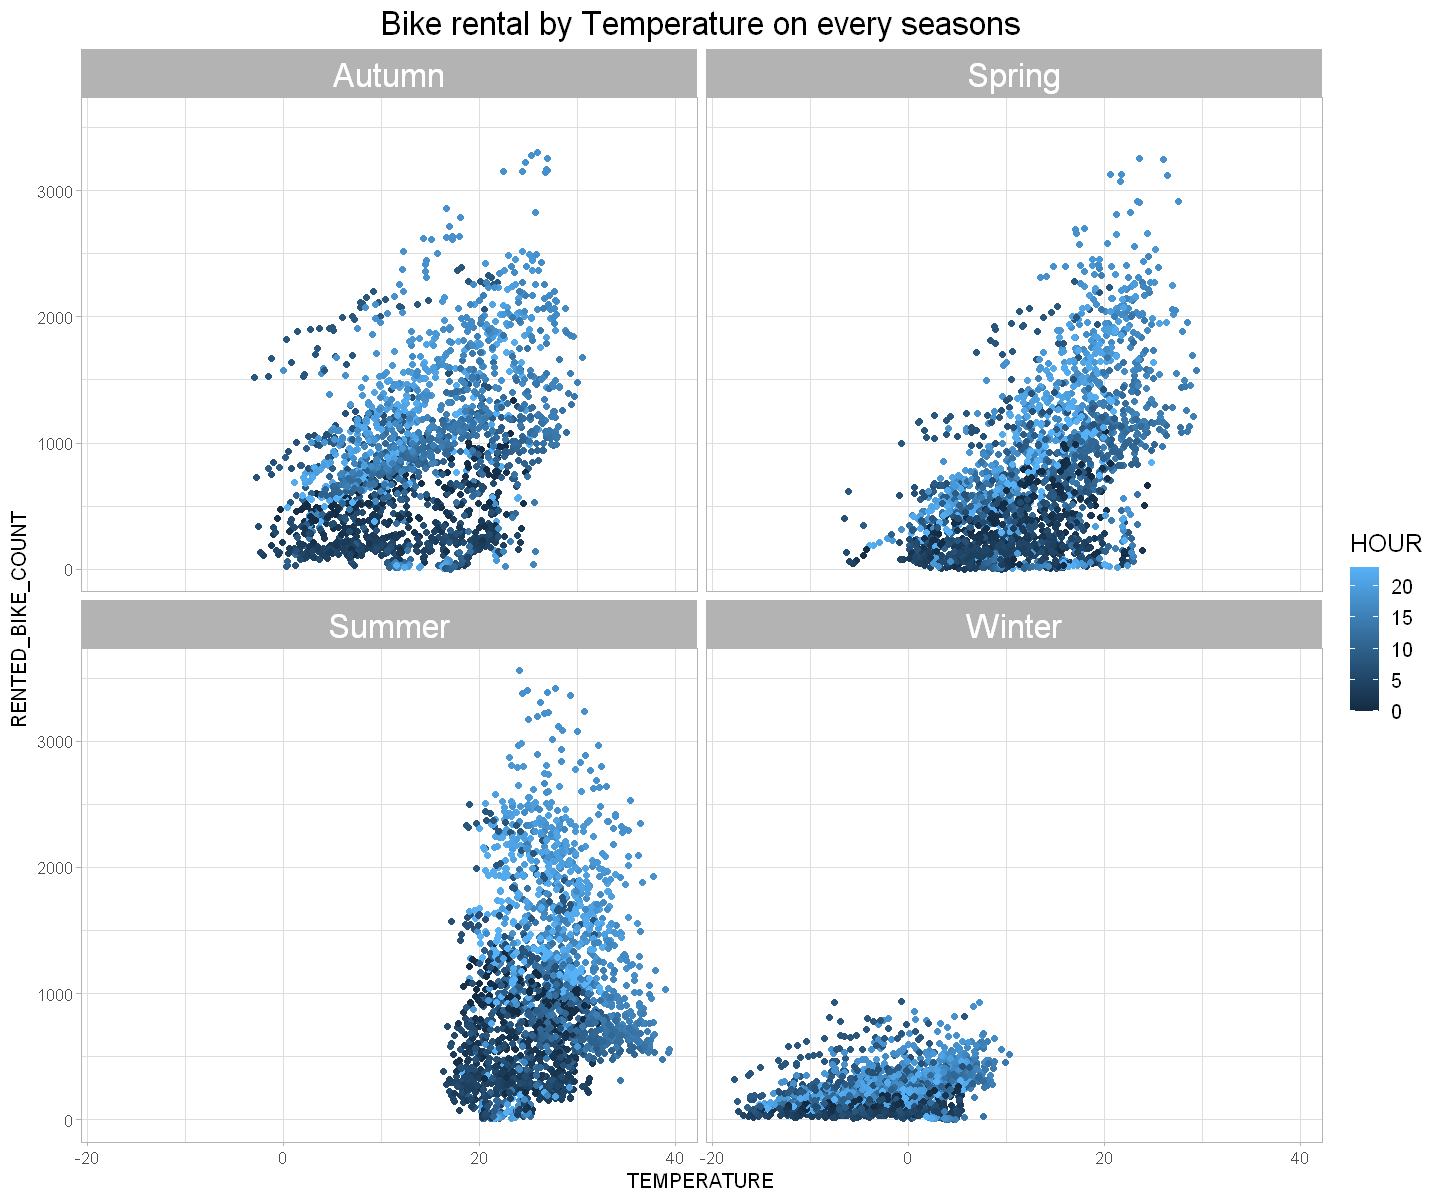

In [51]:

options(repr.plot.width=12, repr.plot.height=10)
plot<-ggplot(seoul_bike_sharing)+
geom_point(aes(TEMPERATURE,RENTED_BIKE_COUNT,colour=HOUR))+
theme(plot.title = element_text(size =20,hjust= 0.5),axis.text = element_text(size = 10),
    axis.title=element_text(size=12),strip.text.x = element_text(size = 20),
      legend.title = element_text(size = 15),legend.text = element_text(size = 12))

plot+facet_wrap(vars(SEASONS))+ggtitle("Bike rental by Temperature on every seasons")

Here we can see there is a positive correlation between the rented bike and temperature on autumn,spring and winter while on summer we have negative correlation.

In [49]:
# summarize the rainfall and snowfall by date
grouped_df<-seoul_bike_sharing %>%
group_by(DATE) %>%
summarize(Rainfall=sum(RAINFALL),Snowfall=sum(SNOWFALL))

Date<-c(rep(grouped_df$DATE,2))
Value<-c(grouped_df$Rainfall,grouped_df$Snowfall)
Weather<-c(rep("Rainfall",353),rep("Snowfall",353))
weather_df<-data.frame(Date,Weather,Value)

<a id="total"> </a>
### Daily Total rainfall and snowfall 

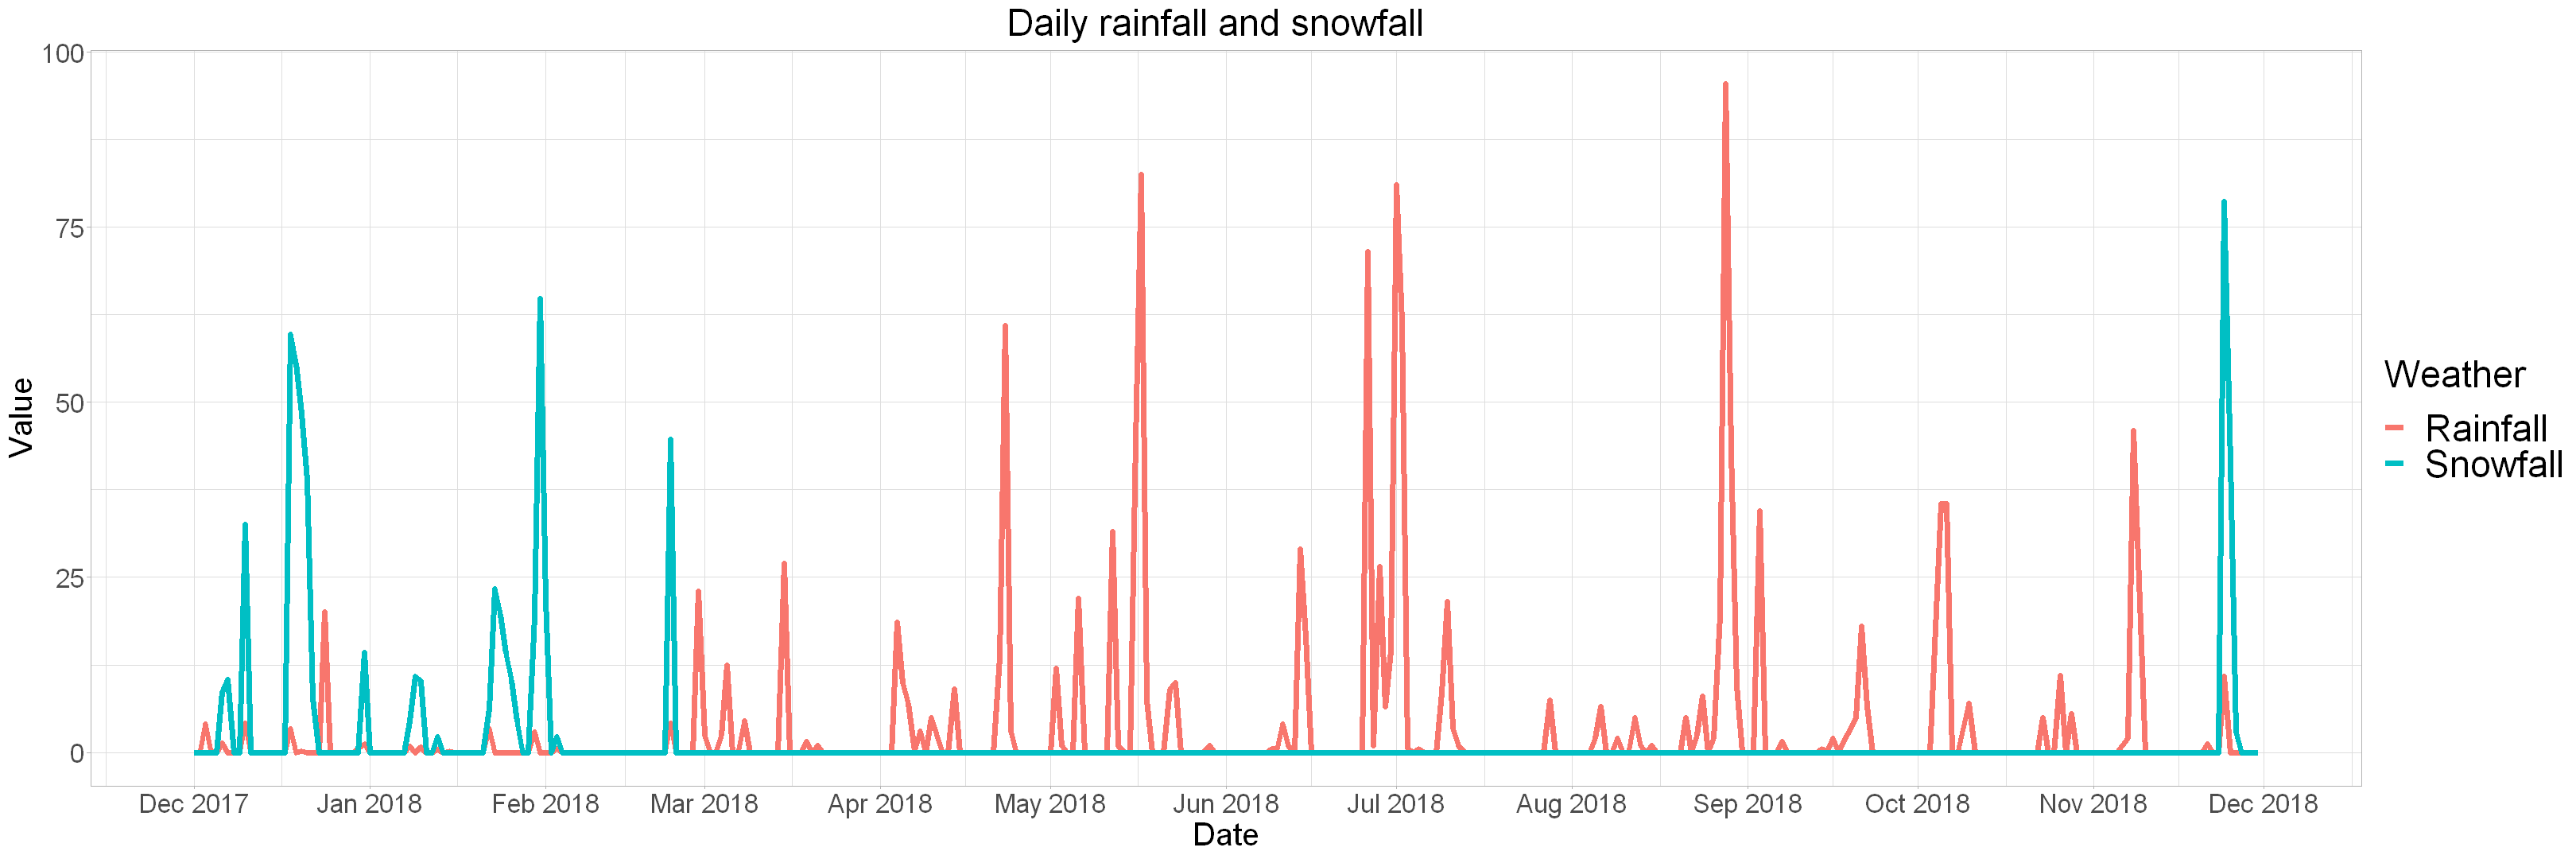

In [56]:
options(repr.plot.width=27, repr.plot.height=9)
ggplot(weather_df,aes(Date,Value,color=Weather,label=Value))+
    geom_line(size=2)+
    geom_text()+
    scale_x_date(date_breaks="1 month",date_label="%b %Y")+
    ggtitle("Daily Total rainfall and snowfall  ")+
 theme(plot.title = element_text(size =28,hjust= 0.5),axis.text=element_text(size=20),axis.title=element_text(size=24),
       legend.title = element_text(size = 28),legend.text = element_text(size = 28))

here we can see that snowfall occur from december into march while the rest of the month in a year dominated by rainfall
